#### Data Mining Versuch Recommender Systeme

* Autor: Prof. Dr. Johannes Maucher
* Datum: 30.09.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Ähnlichkeit:__ Verfahren zur Bestimmung der Ähnlichkeit zwischen Personen (Kunden) und Elementen (Produkten)
* __Empfehlungssysteme__ Collaborative Filtering 
* __Collaborative Filtering:__ Nutzerbezogener Ansatz und elementbasierter Ansatz

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung
### Recommender Systeme
Recommender Systeme werden im E-Commerce eingesetzt um Werbung in Form von kundenspezifischen Empfehlungen zu verteilen. Weitläufig bekannt sind die Amazon-Empfehlungen, die entweder per e-mail geschickt oder nach dem Log-In in der Web-Page angezeigt werden. Diese Empfehlungen werden in Abhängigkeit von den bisher vom jeweiligen Kunden gekauften bzw. bewerteten Produkten erstellt. In diesem Versuch werden die derzeit wohl am weitest verbreiteteten Verfahren für die Erzeugung kundenspezifischer Empfehlungen vorgestellt, darunter das elementweise Collaborative Filtering, welches z.B. auch von Amazon eingesetzt wird.     

Direkt-Marketing Methoden wie die kundenspezifische Erzeugung und Bereitstellung von Werbung erfordern detaillierte Kunden- und Warenkorbanalysen. Kunden mit ähnlichem Kaufverhalten werden in Kundengruppen zusammengefasst. Die Warenkorbanalyse untersucht u.a. welche Waren bevorzugt im Verbund von der gleichen Person gekauft werden. Damit kann ein Händler Werbung in Form von Empfehlungen individuell und gezielt an seine Kunden richten, abhängig davon welcher Kundengruppe er angehört und welche Produkte bevorzugt von dieser Kundengruppe nachgefragt werden. 

Im ersten Teil der Übung werden fiktive Daten in einer überschaubaren Menge verwendet. Es handelt sich hier um Filmbewertungen. Anhand dieses Beispiels sollen die notwendigen Methoden und Abläufe implementiert und getestet werden. Diese werden im zweiten Teil der Übung auf echte Daten angewandt. Hierzu werden über eine Python-API Daten vom Internet-Meta-Radio _last.fm_ integriert. Auf der Basis dieser Daten sollen dann Musikempfehlungen für last.fm User berechnet werden. 

Recommender Systeme lassen sich mit

* Clustering Verfahren
* Suchalgorithmen
* Collaborativen Filtering 
 
realisieren. Am häufigsten wird hierbei das Collaborative Filtering eingesetzt. Für das Collaborative Filtering wird jeder der $M$ User durch einen $N$-dimensionalen Vektor beschrieben, wobei $N$ die Anzahl der Produkte im Angebot des Händlers ist. Jedes Element im Vektor gehört zu einem speziellen Produkt. Das Element hat den Wert 1, wenn der User dieses Produkt bereits gekauft hat, sonst 0 (andere Wertbelegungen sind möglich, z.B. wenn Produktbewertungen vorliegen). Alle $M$ Zeilenvektoren können zur _User/Item_ Matrix zusammengefasst werden (siehe Abbildung).


<img src="https://maucher.home.hdm-stuttgart.de/Pics/UserItemMatrix.png" style="width:500px" align="center">

Das traditionelle **userbasierte Collaborative Filtering (UCF)**, benutzt die Ähnlichkeit zwischen Benutzern: Um für User $U_i$ eine Empfehlung zu erzeugen wird zunächst der diesem User ähnlichste Kunde (oder eine Menge vom ähnlichsten Kunden) ermittelt. Dann werden $U_i$ die Produkte (Items) empfohlen, welche der ähnlichste Kunde gekauft hat, $U_i$ selbst jedoch noch nicht. 

Dieser Ansatz skaliert schlecht im Fall sehr großer _User/Item_-Matrizen. Ausserdem ist er für User, welche erst wenige Produkte gekauft haben unzuverlässig. Besser eignet sich in diesen Fällen das **itembasierte Collaborative Filtering (ICF)**. Es wird u.a. von Amazon.com eingesetzt. Diese Variante benutzt die Ähnlichkeit zwischen Produkten (Items). Dabei sind Produkte umso ähnlicher je mehr Kunden diese Produkte gemeinsam gekauft haben. Für die Produkte welche ein Referenzuser $U_i$ bereits gekauft hat, werden die ähnlichsten Produkte ermittelt. Diese ähnlichsten Produkte werden $U_i$ empfohlen, wenn er sie nicht schon selbst gekauft hat.

Im folgenden Abschnitt werden einige gebräuchliche Metriken für die Berechnung der Ähnlichkeit zwischen Benutzern oder Artikeln vorgestellt. Für Collaboratives Filtering wird sehr häufig das Cosinus - Ähnlichkeitsmaß eingesetzt.


### Gebräuchliche Ähnlichkeitsmaße

Die __euklidische Distanz__ $d_E(\underline{a},\underline{b})$ zwischen zwei n-dimensionalen Vektoren $\underline{a}=(a_1,\ldots,a_n)$ und $\underline{b}=(b_1,\ldots,b_n)$ berechnet sich zu
	$$
	d_E(\underline{a},\underline{b})=\sqrt{\sum_{i=1}^n (a_i-b_i)^2}
	$$
Zwei Vektoren können als umso ähnlicher erachtet werden, je kleiner deren euklidische Distanz ist. 
Ein auf der euklidischen Metrik basierendes Ähnlichkeitsmaß zwischen zwei Vektoren $\underline{a}$ und $\underline{b}$ kann durch 
$$
s_E(\underline{a},\underline{b})=\frac{1}{1+d_E(\underline{a},\underline{b})}
$$
angegeben werden.


__Pearson Korrelation__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Pearson-Korrelationskoeffizient $\rho_{\underline{a},\underline{b}}$ ausgedrückt werden. Er berechnet sich zu
$$
\rho_{\underline{a},\underline{b}}= \frac{1}{N}\cdot \sum\limits_{i=1}^{N}\frac{(a_i-\overline{a})}{\sigma_a} \frac{(b_i-\overline{b})}{\sigma_b}
$$
Dabei bezeichnet $N$ die Länge der Vektoren, $\overline{a}$ den Mittelwert und $\sigma_a$ die Standardabweichung des Vektors $\underline{a}$. 

Der Pearson-Korrelationskoeffizient misst die lineare Abhängigkeit zwischen zwei Vektoren. Der maximale Wert von $+1$ wird erreicht, wenn die durch die beiden Vektoren definierten N Punkte im 2-dimensionalen Raum auf einer ansteigenden Geraden liegen. Der Minimalwert von $-1$ wird erreicht, wenn die Punkte auf einer abfallenden Geraden liegen. Der Betrag des Koeffizienten ist umso kleiner, je stärker die Punkte von einer fiktiven Geraden (kann durch lineare Regression berechnet werden) abweichen. Der Koeffizient ist $0$ wenn keine lineare Abhängigkeit zwischen den Vektoren besteht.


__Cosinus Ähnlichkeitsmaß__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Cosinus $\cos(\underline{a},\underline{b})$ ausgedrückt werden. Er berechnet sich zu
$$
\cos(\underline{a},\underline{b})= \frac{\underline{a} \cdot \underline{b}}{\left\|\underline{a}\right\|\cdot \left\|\underline{b}\right\|}
$$
wobei im Zähler das Skalarprodukt der beiden Vektoren steht und mit $\left\|\underline{x}\right\|$ der Betrag des Vektors $\underline{x}$ bezeichnet wird.

Falls die Vektoren $\underline{a}$ und $\underline{b}$ mittelwertfrei sind, ist der Cosinus-Ähnlichkeitswert gleich dem Pearson-Korrelationswert. In der Dokument- und Textanalyse wird vornehmlich das Cosinus-Ähnlichkeitsmaß verwendet. 


__Russel Rao Ähnlichkeitsmaß__
Die Russel Rao-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert 1 haben und der Länge $n$ der Vektoren. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Russel-Rao-Ähnlichkeit $s_{RR}(\underline{a},\underline{b})=2/6=0.333$.

__Jaccard Ähnlichkeitsmaß__
Die Jaccard-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert $1$ haben und der Anzahl der Stellen in denen mindestens einer der beiden Vektoren ungleich $0$ ist. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Jaccard-Ähnlichkeit $s_{J}(\underline{a},\underline{b})=2/5=0.4$. Die Jaccard Metrik wird in diesem Versuch für die Bestimmung der Ähnlichkeit von _last.fm_-Usern eingesetzt.


## Vor dem Versuch zu klärende Fragen
Eine Untermenge der im Folgenden aufgeführten Fragen wird zu Beginn des Versuchs im Rahmen eines Gruppenkolloqs abgefragt. Auf jede Frage sollte von mindestens einem Gruppenmitglied eine Antwort geliefert werden und jedes Gruppenmitglied muss mindestens eine der gestellten Fragen beantworten können.

**Aufgaben:**

* Beschreiben Sie das Prinzip des userbasierten Collaborativen Filtering (UCF).

Beim Userbasierten Collaborativen Filtering wird für einen Nutzer 1 der ihm ähnlichste Nutzer 2 gesucht, der Nutzer also, der das ähnlichste Kauf- und optional auch das ähnlichsten Bewertungsverhalten zu Nutzer 1 aufweist. Im nächsten Schritt werden Produkte, die bisher lediglich Nutzer 2 gekauft hat, Nutzer 1 zum Kauf empfohlen. Nutzer 1 kann dabei ebenso einer ganzen Kundenmenge zugeteilt werden, innerhalb derer bereits ein ähnliches Kauf- und Bewertungsverhalten erkannt wurde.

* Welche Nachteile hat das UCF?

Nutzer, die noch nicht so viele oder gar keine Items gekauft haben, können nicht vom System verarbeitet werden, da es keine Grundlage für den Vergleich mit anderen Nutzern gibt. Außerdem skaliert der Ansatz UCF hinsichtlich großer Datensätze schlecht. 

* Worin besteht der Unterschied zwischen UCF und itembasierten Collaborativen Filtering (ICF)?

Im Gegensatz zu UCF bewertet ICF die Ähnlichkeit zwischen Items, legt jedoch für die Bemessung der Ähnlichkeit das Kaufverhalten von Usern zu Grunde. Items werden als ähnlich bewertet, wenn User sie häufig zusammen kaufen. Einem einzelnen User werden nun Produkte empfohlen, die über eine große Ähnlichkeit zu den Produkten verfügen, die er/sie bereits gekauft hat.

* Gegeben seien die Vektoren 

    \begin{eqnarray*}
    \underline{a} & = & [1,2,3,4,5,6] \\
    \underline{b} & = & [3,3,5,6,7,8] \\
    \end{eqnarray*}
    
    Schreiben Sie eine Python Funktion, die den Mittelwert derartiger Vektoren berechnet. Schreiben Sie eine weitere Funktion, die die Varianz berechnet

In [1]:
import numpy as np


def arithmeticMean(vec):
    return sum(vec) / len(vec)


def variance(vec):
    mean = arithmeticMean(vec)
    return sum([(x - mean) ** 2 for x in vec]) / len(vec)


vec_a = np.array((1, 2, 3, 4, 5, 6))
vec_b = np.array((3, 3, 5, 6, 7, 8))

print("Arithmetic mean of vector a is: ", round(arithmeticMean(vec_a), 2))
print("Arithmetic mean of vector b is: ", round(arithmeticMean(vec_b), 2))

print("Variance of vector a is: ", round(variance(vec_a), 2))
print("Variance of vector b is: ", round(variance(vec_b), 2))

Arithmetic mean of vector a is:  3.5
Arithmetic mean of vector b is:  5.33
Variance of vector a is:  2.92
Variance of vector b is:  3.56


* Wie groß ist die

    - Euklidische Ähnlichkeit
    - Pearson Ähnlichkeit
    - Cosinus Ähnlichkeit
    
    zwischen den Vektoren $\underline{a}$ und $\underline{b}$? 

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.linalg import norm

euclidean_distance = norm(vec_a - vec_b)
print('Euclidean distance between vector a and vector b:', round(euclidean_distance, 2))

pearson_sim = np.corrcoef(vec_a, vec_b)[0][1]
print('Pearson similarity between vector a and vector b:', round(pearson_sim, 2))

cosine_sim = np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))
print('Cosine similarity between vector a and vector b:', round(cosine_sim, 2))

Euclidean distance between vector a and vector b: 4.58
Pearson similarity between vector a and vector b: 0.98
Cosine similarity between vector a and vector b: 0.99


* In welchen Fällen sind Cosinus- und Pearsonähnlichkeit der euklidischen Ähnlichkeit vorzuziehen?

Anders als die Euklidische Distanz sind die Cosinus- und die Pearson-Ähnlichkeit unabhängig von den absoluten Differenzen der jeweiligen Vergleichswerte in beiden Eingabevektoren. Dies ist vor allem wichtig, wenn man daran interessiert ist, ob sich Vektoren nicht in absoluten Größen, sondern in ihrem relativen Verhältnis zueinander ähneln. Pearson- und Cosinusähnlichkeit erkennen dabei lineare Gemeinsamkeiten zweier Vektoren und vergleichen demnach die Steigungen der Vektoren. Das ist sehr nützlich, weil beispielsweise bei Bewertungssystemen häufig zu erkennen ist, dass zwei Nutzerinnen zwar zu einer sehr ähnlichen Rankingreihenfolge ihrer Lieblingsprodukte gekommen sind, dass aber die eine Nutzerin in ihrer *absoluten* Bewertung von Produkten jeweils weniger Sterne vergibt als die andere Nutzerin. Im Gegensatz zur euklidischen Ähnlichkeit, welche die Differenzen der einzelnen Bewertungswerte stark gewichten würde, erkennen die Cosinus- und die Pearson-Ähnlichkeit in diesem Fall die lineare Gemeinsamkeit der Rankingreihenfolgen und stufen die beiden Nutzerinnen als ähnlich ein.

In [3]:
from IPython.display import Latex
from IPython.display import Image
import pylast

Hier wird eine kleine Hilfsfunktion definiert, die Daten in Form eines Dictionaries 


In [4]:
to_df = lambda input_dict, column_name: DataFrame.from_dict(
    data=input_dict, orient="index", columns=[column_name])

# Versuchsdurchführung
## Teil 1: Fiktive Filmbewertung
### Daten
Folgende Tabelle enthält die Filmbewertungen von 7 Personen.

<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmRecommendations.PNG" style="width:500px" align="center">


Die Tabelle ist als Python dictionary _critics_ implementiert. Die Keys des Python-Dictionary definieren die Namen von Personen (Zeilen in der Matrix), die Filme bewertet haben. Die Values sind selbst wieder Dictionarys, welche als Keys die Filmnamen (Spalten in der Matrix) und als Values die jeweilige Filmbewertung (Matrixelment) enthalten.

In [5]:
critics = {'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
                         'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
                         'The Night Listener': 3.0},
           'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
                            'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
                            'You, Me and Dupree': 3.5},
           'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
                                'Superman Returns': 3.5, 'The Night Listener': 4.0},
           'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
                            'The Night Listener': 4.5, 'Superman Returns': 4.0,
                            'You, Me and Dupree': 2.5},
           'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
                            'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
                            'You, Me and Dupree': 2.0},
           'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
                             'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
           'Toby': {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
           }

transCritcs = {'Lady in the Water': {'Lisa Rose': 2.5, 'Gene Seymour': {''}}}

### Ähnlichkeiten berechnen

Für die Bestimmung der Ähnlichkeit zwischen Personen und Produkten werden in diesem Versuch ein auf der euklidischen Distanz basierendes Ähnlichkeitsmaß und die Pearson-Korrelation verwendet. Beide Ähnlichkeitsmaße sind in den unten definierten Funktionen implementiert. Alle drei hier implementierten Funktionen zur Berechnung der Ähnlichkeit erhalten als Übergabeparameter das oben definierte Dictionary, das die Filmbewertungen enthält und die Namen der zwei Personen, die verglichen werden sollen. 

Zu beachten ist, dass in beiden Funktionen für die Berechnung der Ähnlichkeit zwischen zwei Personen nur die Produkte berücksichtigt werden, welche von beiden Personen schon bewertet wurden. Es handelt sich hier also um modifizierte Ähnlichkeitsfunktionen. 

__Aufgabe:__
Fragen Sie von diesem Dictionary _Toby's_ Bewertung des Films _Snakes on a Plane_ ab und geben Sie diesen Wert aus: 

In [6]:
rating = critics["Toby"]["Snakes on a Plane"]
print("Toby, unfortunately, has seen Snakes on a Plane and has rated it with: {}".format(rating))

Toby, unfortunately, has seen Snakes on a Plane and has rated it with: 4.5


In [7]:
import numpy as np
import scipy.spatial.distance as sci


def sim_euclid(prefs, person1, person2, normed=True):
    ''' Returns a euclidean-distance-based similarity score for
    person1 and person2. In the distance calculation the sum is computed
    only over those items, which are nonzero for both instances, i.e. only
    films which are ranked by both persons are regarded.
    If the parameter normed is True, then the euclidean distance is divided by
    the number of non-zero elements integrated in the distance calculation. Thus
    the effect of larger distances in the case of an increasing number of commonly ranked
    items is avoided.
    '''
    # Get the list of shared_items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]: si[item] = 1
    # len(si) counts the number of common ratings
    # if they have no ratings in common, return 0
    if len(si) == 0: return 0

    # Add up the squares of all the differences
    sum_of_squares = np.sqrt(sum([pow(prefs[person1][item] - prefs[person2][item], 2)
                                  for item in prefs[person1] if item in prefs[person2]]))
    if normed:
        sum_of_squares = 1.0 / len(si) * sum_of_squares
    return 1 / (1 + sum_of_squares)


def sim_pearson(prefs, p1, p2):
    '''
    Returns the Pearson correlation coefficient for p1 and p2
    '''

    # Get the list of commonly rated items
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]: si[item] = 1

    # if they are no ratings in common, return 0
    if len(si) == 0: return 0

    # Sum calculations
    n = len(si)

    # Calculate means of person 1 and 2
    mp1 = np.mean([prefs[p1][it] for it in si])
    mp2 = np.mean([prefs[p2][it] for it in si])

    # Calculate standard deviation of person 1 and 2
    sp1 = np.std([prefs[p1][it] for it in si])
    sp2 = np.std([prefs[p2][it] for it in si])

    # If all elements in one sample are identical, the standard deviation is 0.
    # In this case there is no linear correlation between the samples
    if sp1 == 0 or sp2 == 0:
        return 0
    r = 1 / (n * sp1 * sp2) * sum([(prefs[p1][it] - mp1) * (prefs[p2][it] - mp2) for it in si])
    return r


def sim_RusselRao(prefs, person1, person2, normed=True):
    ''' Returns RusselRao similaritiy between 2 users. The RusselRao similarity just counts the number
    of common non-zero components of the two vectors and divides this number by N, where N is the length
    of the vectors. If normed=False, the division by N is omitted.
    '''
    # Get the list of shared_items
    si = {}
    commons = 0
    for item in prefs[person1]:
        if prefs[person1][item] == 1 and prefs[person2][item] == 1:
            commons += 1
    #print commons
    if not normed:
        return commons
    else:
        return commons * 1.0 / len(prefs[person1])

**Aufgabe:**
1. Geben Sie die euklidische Ähnlichkeit und die Pearson Ähnlichkeit zwischen den Personen _Toby_ und _Lisa Rose_ aus.
2. Diskutieren Sie die unterschiedlichen Ähnlichkeitswerte.

In [8]:
df_critics = DataFrame.from_dict(critics)

<AxesSubplot:title={'center':'Ratings of Movies by Person'}>

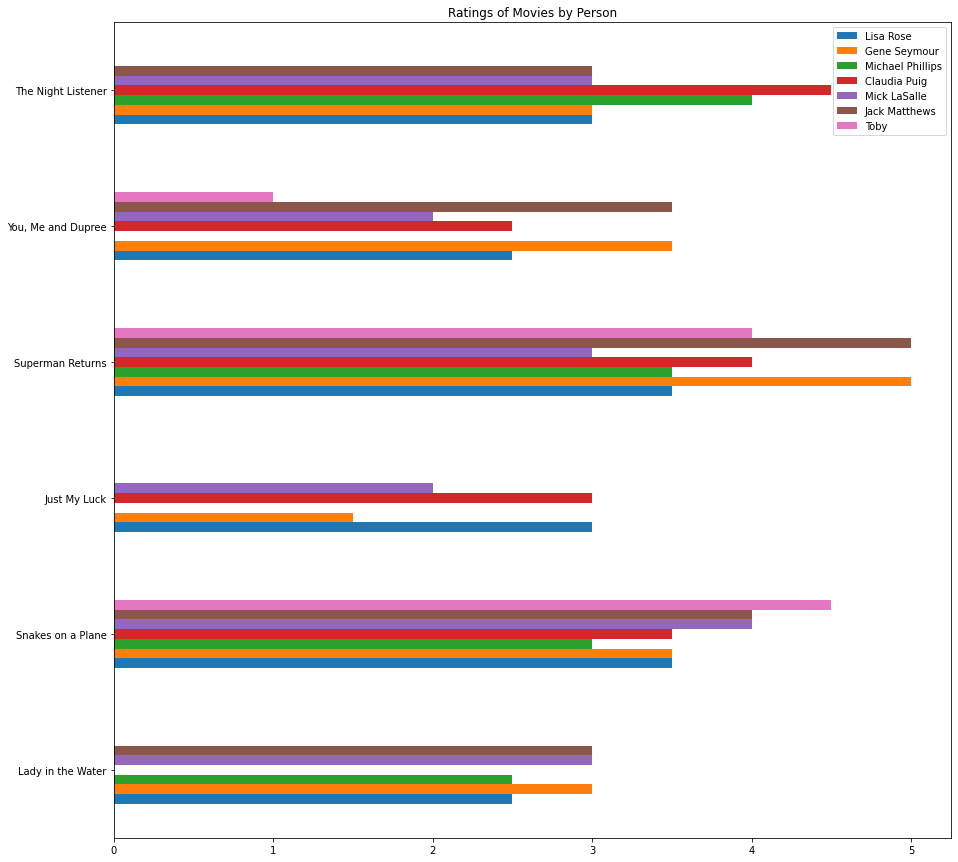

In [9]:
df_critics.plot(kind='barh', figsize=(15, 15), title="Ratings of Movies by Person")

In [10]:
person1 = "Toby"
to_df(critics[person1], f"Movie ratings by {person1}")

,Movie ratings by Toby
Snakes on a Plane,4.5
"You, Me and Dupree",1.0
Superman Returns,4.0


In [11]:
person2 = "Lisa Rose"
to_df(critics[person2], f"Movie ratings by {person2}")

,Movie ratings by Lisa Rose
Lady in the Water,2.5
Snakes on a Plane,3.5
Just My Luck,3.0
Superman Returns,3.5
"You, Me and Dupree",2.5
The Night Listener,3.0


In [12]:
euclidean_similarity = sim_euclid(critics, person1, person2)
f"Euclidean similarity between Toby and Lisa Rose is {round(euclidean_similarity, 4)}"

'Euclidean similarity between Toby and Lisa Rose is 0.6159'

In [13]:
euclidean_similarity_normed = sim_euclid(critics, person1, person2, normed=True)
f"Euclidean normed similarity between Toby and Lisa Rose is {round(euclidean_similarity_normed, 4)}"

'Euclidean normed similarity between Toby and Lisa Rose is 0.6159'

In [14]:
pearson_similarity = sim_pearson(critics, person1, person2)
f"Pearson similarity between Toby and Lisa Rose is {pearson_similarity}"

'Pearson similarity between Toby and Lisa Rose is 0.9912407071619302'

##### Diskussion:

Die Ergebnisse der berechneten Ähnlichkeitswerte sind sehr unterschiedlich. Vor allem die Pearson-Ähnlichkeit ist mit 0,991 überraschend groß und gegeben dem Ausgabebereich von -1 bis 1 sehr nahe am Maxmimum.

Des Weiteren ist bei der Betrachtung der Werte aufgefallen, dass es eine lineare Abhängigkeit zwischen den Bewertungen der Filme von Toby und von Lisa Rose gibt. Dies ist die wahrscheinlichste Erklärung für den hohen Wert der Pearson-Ähnlichkeit. Beide haben fast dasselbe Ranking, bis auf dass Toby in seinem Ranking den Film "Snakes on a Plane" auf Platz 1 hat und bei Lisa "Snakes on a Plane" und "Superman Returns" punktgleich sind.  

Im Gegensatz zur Pearson-Ähnlichkeit arbeitet die euklidische Distanz mit den Differenzen zwischen den Nutzerbewertungen der jeweils gleichen Filme. Da in diesem Fall lediglich die absoluten Differenzen zwischen den Werten betrachtet werden und diese durchaus vorhanden sind, ergibt sich eine vergleichsweise kleinere euklidische Aehnlichkeit.

__Aufgabe:__
0. Schreiben Sie eine Funktion _topMatches(prefs,person,similarity)_, welche für eine beliebige in _critics_ enthaltene Person die Ähnlichkeitswerte zu allen anderen Personen berechnet und in einer geordneten Liste zurück gibt. Der Funktion soll als Übergabeparameter auch die anzuwendende Ähnlichkeitsfunktion (*sim_euclid* oder *sim_pearson*) übergeben werden können. Berechnen Sie mit dieser Funktion für jede Person die *top matches*, zunächst unter Verwendung der euklidischen- dann unter Verwendung der Pearson-Ähnlichkeit.
1. Geben Sie mit der implementierten Funktion die *top matches* der Person Toby aus.
2. Vergleichen Sie die beiden Ähnlichkeitsmaße. Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

Zuerst wird die Funktion definiert, welche die Ähnlichkeiten für die Kombinationen aller Personen mit der Eingabeperson berechnet. Zusätzlich dazu kann man die Ausgabe sortieren und auf eine Anzahl an Ausgabewerte beschränken.

In [15]:
def topMatches(comp_dict, x, similarity, sort=False, limit=-1):
    similarities = [similarity(comp_dict, x, y) for y in comp_dict if y != x]

    if sort:
        return sorted(similarities[:limit if limit != -1 else len(similarities)], reverse=True)
    else:
        return similarities[:limit if limit != -1 else len(similarities)]


def topMatchesAsDict(comp_dict, x, similarity, sort=False):
    similarities = {y: similarity(comp_dict, x, y) for (y, v) in comp_dict.items() if y != x}

    if sort:
        return sorted(similarities.items(), key=lambda x: x[1])
    else:
        return similarities

In [16]:
top_matches_euclid = topMatchesAsDict(critics, "Toby", sim_euclid)
top_matches_pearson = topMatchesAsDict(critics, "Toby", sim_pearson)

,Matching Score
Lisa Rose,0.615912
Gene Seymour,0.510875
Michael Phillips,0.558482
Claudia Puig,0.624639
Mick LaSalle,0.666667
Jack Matthews,0.522774


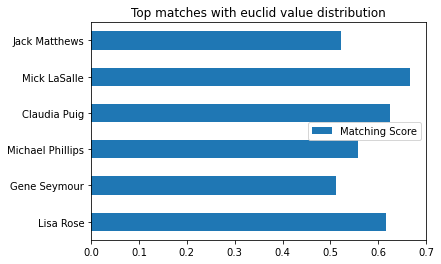

In [17]:
df_euclid = to_df(top_matches_euclid, "Matching Score")
df_euclid.plot(kind='barh', title="Top matches with euclid value distribution")
df_euclid

,Matching Score
Lisa Rose,0.991241
Gene Seymour,0.381246
Michael Phillips,-1.000000
Claudia Puig,0.893405
Mick LaSalle,0.924473
Jack Matthews,0.662849


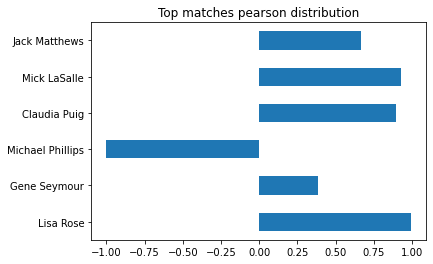

In [18]:
df_pearson = to_df(top_matches_pearson, "Matching Score")
df_pearson.plot(kind='barh', title="Top matches pearson distribution", legend=None)
df_pearson

##### Fazit Ähnlichkeitsmaße

Man kann erkennen, dass der Wertebereich der Pearson-Ähnlichkeit (-1 bis 1) breiter ausgenutzt wird, als der der euklidischen Ähnlichkeit (0 bis 1).

Der Pearson Algorithmus unterscheidet  gleichzeitig eher die persönlichen Ranglisten der Benutzer, während der euklidische Algorithmus lediglich die absoluten Differenzen zwischen den Filmbewertungen der einzelnen User in Betracht zieht. Das liegt daran, dass sich der Pearson Algorithmus Skalierungsinvariant verhält. Im Falle von zwei Usern, die die selben Filme gesehen haben und bei denen der erste User alle Filme genau einen Punkt höher bewertet als der zweite User, würden beide User die selbe Empfehlung bekommen.


Wie auch schon in der vorherigen Aufgabe festgestellt, sind lineare Abhängigkeiten bei der Domäne der Filmbewertungen relevanter. Deswegen ist der Gebrauch der Pearson-Ähnlichkeit auch sinnvoller, um ähnliche Bewertungsmuster zu erkennen.

### Berechnung von Empfehlungen mit User basiertem Collaborative Filtering
Für die Produkte, die von einer Person noch nicht gekauft wurden, sollen Empfehlungen berechnet werden. Die Empfehlungen können ebenfalls Werte zwischen 1 (wird nicht empfohlen) und 5 (wird stark empfohlen) annehmen. Für die Berechnung der Empfehlung werden die Bewertungen des jeweiligen Produkts durch die anderen Personen herangezogen. Dabei werden die Bewertungen der ähnlichen Personen (d.h. hoher Pearson-Korrelationswert) stärker mit einbezogen als die Bewertungen durch Personen mit einem niedrigen Korrelationswert.

__Beispiel:__
Toby hat die Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ noch nicht gekauft. Für diese Filme soll für Toby eine Empfehlung berechnet werden.
In der unten aufgeführten Tabelle enthält die zweite Spalte die _Pearson-Ähnlichkeitswerte_ zwischen Toby und den anderen Personen. Die Spalten 3, 5 und 7 enthalten die Bewertungen der Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ durch die anderen Personen. Die Spalten 4, 6 und 8 enthalten die jeweilige Filmbewertung gewichtet (mulipliziert) mit den Ähnlichkeitswerten der jeweiligen Person. Es fällt auf, dass in der Tabelle _Michael_ nicht enthalten ist. Das liegt daran, dass _Michael_ und _Toby_ einen negativen Ähnlichkeitswert aufweisen, d.h. deren Interessen sind gegenläufig. Personen mit negativem Ähnlichkeitswert sollten für Empfehlungen nicht berücksichtigt werden.
Die Zeile _Sum_ enthält die Summe aller gewichteten Bewertungen. Aus diesem Wert allein kann die Empfehlung noch nicht abgeleitet werden, da Filme die nur von wenigen Personen bewertet wurden, eine relativ kleine Summe ergeben. Deshalb sollte _Sum_ noch durch die Anzahl der Bewertungen für diesen Film geteilt werden. Oder besser: Nicht durch die Summe der Bewertungen, sondern durch die Summe der relevanten Ähnlichkeitswerte (_KSum_). Der resultierende Empfehlungswert ist in der letzten Zeile eingetragen.



<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmCalculation.PNG" style="width:500px" align="center">




__Aufgabe:__
Schreiben Sie eine Funktion _getRecommendations(prefs,person,similarity)_, mit der die Empfehlungswerte berechnet werden können und bestimmen Sie die Empfehlungswerte für Toby. Der Funktion wird  

* das Dictionary _critics_ mit den Filmbewertungen, 
* der Name der Person, für welche Empfehlungen berechnet werden sollen
* die Methode für die Berechnung der Ähnlichkeit *sim_euclid* oder *sim_pearson*

übergeben. Die Methode soll eine geordnete Liste zurück geben. Jedes Listenelement enthält an erster Stelle den berechneten Empfehlungswert und an zweiter Stelle den Namen des Films. Die Liste soll nach Empfehlungswerten absteigend geordnet sein.

Testen Sie diese Funktion indem Sie die Empfehlungen für _Toby_ berechnen und mit den Werten in der oben aufgeführten Tabelle vergleichen.

In [19]:
from functools import reduce
from pandas import DataFrame

Zuerst wird eine Reihe an Hilfsfunktionen definiert, welche die Auswertung der Daten mit Collaboratorive Filtering erleichtert.

Die nächsten beiden Funktionen holen jeweils alle individuellen Personen und Filme aus der gegebenen Dictionary-Struktur.

In [20]:
def get_all_items(prefs):
    return set(reduce(
        lambda first, nxt: first + nxt,
        [list(movies.keys()) for (person, movies) in prefs.items()],
        []))

In [21]:
def get_all_persons(prefs):
    return list(prefs.keys())

_Funktion, die alle Personen zurückgibt, welche eine Ähnlichkeit durch die gegebene Funktion größer 0 haben._

In [22]:
def get_similar_persons(prefs, person, sim_f):
    return list(filter(lambda comp_person: sim_f(prefs, person, comp_person) > 0 and person != comp_person,
                       get_all_persons(prefs)))

_Funktion, die alle Filme zurück gibt, welche die gegebene Person noch nicht gesehen hat._

In [23]:
def get_unrated_items(person_dict, person, zero_means_unrated=False):
    if zero_means_unrated:
        items_flattened = dict(filter(lambda k_v_tuple: k_v_tuple[1] == 0, person_dict[person].items()))
        return items_flattened.keys()
    else:
        items = get_all_items(person_dict)
        return items.difference(set(person_dict[person]))

_Funktion, die alle Personen zurück gibt, welche den gegebenen Film schon bewertet haben. 
Die Liste an Personen kann gegeben werden, sonst werden alle Personen angeschaut._

In [24]:
def get_persons_that_rated(prefs, item, comp_persons=None):
    persons = comp_persons if comp_persons else get_all_persons(prefs)
    return filter(lambda person: item in prefs[person].keys(), persons)

_Funktion die eine Dictionary Struktur mit den K*N Werten für alle gegebenen Personen für einen gegebenen Film zurück gibt._

In [25]:
def get_k_n(prefs, movie, person, sim_f, comp_persons=None):
    comp_persons = comp_persons if comp_persons else get_all_persons(prefs)
    return {comp_person: (sim_f(prefs, person, comp_person) * prefs[comp_person][movie])
            for comp_person in comp_persons}

_Funktion, die die Summe aller K-Werte für eine List von gegebenen Personen mit Hilfe einer Funktion zur Berechnung der jeweiligen K-Werte kalkuliert und zurückgibt._

In [26]:
def get_k_sum(prefs, person, comp_persons, f_sim):
    return sum([f_sim(prefs, person, comp_person) for comp_person in comp_persons])

Nun, da alle Hilsfunktionen definiert wurden, kann sich der eigentlichen Aufgabe gewidmet werden.

Die Folgende Funktion gibt den Recommendation-Score für alle Filme aus, welche die gegebene Person noch nicht gesehen hat. Als Basis für diesen Score wird eine gegebene Similarity-Funktion genutzt.

In [27]:
from functools import reduce
from pandas import DataFrame


def get_user_recommendations(person_dict, person, similarity, zero_means_unrated=False, get_as_dict=True):
    comp_persons = get_similar_persons(person_dict, person, similarity)
    print(f"Persons with similarity greater than 0: {comp_persons}")

    items = get_all_items(person_dict)
    print(f"Individual items: {items}")

    items_not_rated = get_unrated_items(person_dict, person, zero_means_unrated=zero_means_unrated)
    print(f"Items that {person} has not rated: {items_not_rated}")

    k_n = {item: get_k_n(person_dict,
                         item,
                         person,
                         similarity,
                         comp_persons=get_persons_that_rated(person_dict, item, comp_persons=comp_persons))
           for item in items_not_rated}

    recommendations_dict = {item: sum(k_n[item].values()) / get_k_sum(person_dict, person,
                                                                      get_persons_that_rated(person_dict, item,
                                                                                             comp_persons),
                                                                      similarity)
                            for item in k_n.keys()}

    if get_as_dict:
        return recommendations_dict

    return sorted(map(lambda x: (x[1], x[0]), recommendations_dict.items()), reverse=True)

In [28]:
person = "Toby"
recommendations = get_user_recommendations(critics, person, sim_pearson)
to_df(recommendations, f"Movie Recommendation Scores for {person}")

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Toby has not rated: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}


,Movie Recommendation Scores for Toby
Lady in the Water,2.832550
Just My Luck,2.530981
The Night Listener,3.347790


Der Film The Night Listener hat mit 3.34 Sternen dem UCF-Algorithmus mit Pearson zufolge die genaueste Übereinstimmung mit Tobys persönlichen Präferenzen. Das stimmt mit den in der Tabelle angegeben Werten überein. Des Weiteren haben wir den Algorithmus so implementiert, dass er auch mit euklidischer Ähnlichkeit aufgerufen werden kann.

Im nächsten Schritt wird getestet, ob die Empfehlungen für die User Michael Phillips und Toby im UCF abweichen, wenn das auf der euklidischen Distanz beruhende Ähnlichkeitsmaß anstatt der Pearson-Ähnlichkeit verwendet wird. Es werden nur diese beiden Nutzer getestet, da die restlichen Nutzer entweder alle oder alle bis auf einen der zur Verfügung stehenden Filme bereits bewertet haben.

###### Recommendation-Reihenfolge Euklid- vs. Pearson-Ähnlichkeitsmaße

##### Euklid bei Michael

In [29]:
person = 'Michael Phillips'
recommendations_euclid = get_user_recommendations(critics, person, sim_euclid)
df_user_based = DataFrame.from_dict(data=recommendations_euclid, orient="index", columns=[f'Movies recommended for {person} based on similar users by using euclidean similarity'])
df_user_based

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews', 'Toby']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Michael Phillips has not rated: {'Just My Luck', 'You, Me and Dupree'}


,Movies recommended for Michael Phillips based on similar users by using euclidean similarity
Just My Luck,2.414052
"You, Me and Dupree",2.531534


##### Euklid bei Toby

In [30]:
person = 'Toby'
recommendations_euclid = get_user_recommendations(critics, person, sim_euclid)
df_user_based = DataFrame.from_dict(data=recommendations_euclid, orient="index", columns=[f'Movies recommended for {person} based on similar users by using euclidean similarity'])
df_user_based

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Michael Phillips', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Toby has not rated: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}


,Movies recommended for Toby based on similar users by using euclidean similarity
Lady in the Water,2.795737
Just My Luck,2.407393
The Night Listener,3.427348


##### Pearson bei Michael

In [31]:
person = 'Michael Phillips'
recommendations_pearson = get_user_recommendations(critics, person, sim_pearson)
df_user_based = DataFrame.from_dict(data=recommendations_pearson, orient="index", columns=[f'Movies recommended for {person} based on similar users by using pearson similarity'])
df_user_based

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Michael Phillips has not rated: {'Just My Luck', 'You, Me and Dupree'}


,Movies recommended for Michael Phillips based on similar users by using pearson similarity
Just My Luck,2.809276
"You, Me and Dupree",2.694637


##### Pearson bei Toby

In [32]:
person = 'Toby'
recommendations_pearson = get_user_recommendations(critics, person, sim_pearson)
df_user_based = DataFrame.from_dict(data=recommendations_pearson, orient="index", columns=[f'Movies recommended for {person} based on similar users by using pearson similarity'])
df_user_based

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Toby has not rated: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}


,Movies recommended for Toby based on similar users by using pearson similarity
Lady in the Water,2.832550
Just My Luck,2.530981
The Night Listener,3.347790


##### Fazit Vergleich UCF mit Pearson vs. UCF mit Euklid

Bei der Person Toby sind für beide Ähnlichkeitsmaße das Ranking gleich und die Werte sehr ähnlich.

Bei Michael Phillips dagegen sind Ranking sowie Empfehlungswerte zwischen euklidischem Ähnlichkeitsmaß und Pearson-Ähnlichkeitsmaß sehr unterschiedlich. Dies könnte daran liegen, dass der Euklid-Algorithmus für Michael Phillips zwei Personen mehr als relevant für die Berechnung der Empfehlungswerte eingestuft hat als der Pearson-Algorithmus. Diese zwei Personen sind Mick LaSalle und Toby. Die Vermutung liegt nahe, dass der Pearson-Algorithmus wie schon in den Einführungsaufgaben erkannt hat, dass Michael Philipps bei seinen Filmbewertungen ein anderes Ranking hat als Toby und Mick LaSalle. Dieses Ranking kann der Euklid-Algorithmus dagegen nicht erkennen.

Der UCF mit euklidischem Ähnlichkeitsmaß ergibt bei Michael Phillips:
1. You, Me and Dupree 2.531534
2. Just My Luck 2.414052

Mit Euklid ausgewählte Vergleichspersonen: 'Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews', 'Toby'.

Mit Pearson-Ähnlichkeitsmaß ergegeben sich dagegen folgende Werte:
1. Just My Luck 2.809276
2. You, Me and Dupree 2.694637

Mit Pearson ausgewählte Vergleichspersonen: 'Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Jack Matthews'.



In [33]:
print('Filmempfehlungen von Toby', critics['Toby'])
print('Filmempfehlungen von Mick LaSalle', critics['Mick LaSalle'])
print('Filmempfehlungen von Michael Philipps', critics['Michael Phillips'])

Filmempfehlungen von Toby {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
Filmempfehlungen von Mick LaSalle {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 2.0}
Filmempfehlungen von Michael Philipps {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0}


Die Vermutung wurde bestätigt. Toby und Mick LaSalle haben beide den Film 'Snakes on a Plane'
in ihrem Ranking auf Platz 1, während Michael Philipps diesen Film nur als mittelwertig bewertet hat.
Im Gegensatz dazu hat Michael Philipps den Film 'The Night Listener' bei sich auf Platz 1, während
Mick LaSalle diesen Film als mittelmäßig und Toby diesen Film gar nicht bewertet bzw. gekauft hat.

Der Euklid-Algorithmus hingegen vergleicht lediglich die Differenz zwischen der Bewertung desselben Filmes (z.B. Superman Returns: Michael Phillipps 3.5, Toby 4.0) und stuft Toby und Mick LaSalle dementsprechend als ähnlich zu Michael Philipps ein, da diese Differenzen nicht besonders groß sind.

In [34]:
print('Filmempfehlungen von Lisa Rose', critics['Lisa Rose'])
print('Filmempfehlungen von Claudia Puig', critics['Claudia Puig'])
print('Filmempfehlungen von Gene Seymour', critics['Gene Seymour'])
print('Filmempfehlungen von Jack Matthews', critics['Jack Matthews'])

Filmempfehlungen von Lisa Rose {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 'The Night Listener': 3.0}
Filmempfehlungen von Claudia Puig {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'The Night Listener': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 2.5}
Filmempfehlungen von Gene Seymour {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 3.5}
Filmempfehlungen von Jack Matthews {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5}


Bei der Betrachtung der vier Personen, die der Pearson-Algorithmus als ähnlich zu Michael Philipps
eingestuft hat, sticht als erstes Claudia Puig heraus, die über das fast exakt gleiche Ranking wie
Michael verfügt. Beide haben 'The Night Listener' auf Platz 1, 'Superman returns' als Platz 2 und 
'You, me and Dupree' an letzter Stelle.
Bei den anderen drei Personen ist die Gemeinsamkeit mit Michael Philipps, dass sie 'Lady in the Water'
sowie 'You, Me and Dupree' eher schlecht bewertet haben, 'Superman returns' dagegen genau wie Michael
Philipps als besten oder zweitbesten Film bewerteten. 

_Fazit:_ Zusammenfassend kann man sagen, dass der Pearson-Algorithmus bei der Ähnlichkeitseinschätzung
zwischen Personen auch deren Rankingreihenfolge der einzelnen Filme miteinbezieht, während der
Euklid-Algorithmus diese außer Acht lässt.

### Berechnung von Empfehlungen mit Item basiertem Collaborative Filtering
In den vorigen Aufgaben wurden Ähnlichkeiten zwischen Personen bestimmt und für Produktempfehlungen benutzt (User basiertes Collaborative Filtering). Jetzt soll die Ähnlichkeit zwischen Produkten berechnet werden und auf der Basis dieser Produktähnlichkeit Empfehlungen berechnet werden (Item basiertes Collaborative Filtering).

Dabei sollen die bereits implementierten Ähnlichkeitsfunktion *sim_euclid* und *sim_pearson* sowie die Ähnlichkeeits-Sortierfunktion *topMatches* unverändert eingesetzt werden.

__Aufgabe:__

1. Implementieren Sie eine Funktion, welche das Bewertungsdictionary *critics* derart transformiert, dass die Funktionen *sim_euclid*, *sim_pearson* und *topMatches* für das Item-basierte CF unverändert eingesetzt werden können. Die transformierte Matrix soll unter dem Namen *transCritics* abgespeichert werden.
2. Schreiben Sie eine Funktion *calculateSimilarItems*, die aus der transformierten Matrix *transCritics* ein Dictionary berechnet, welches die Ähnlichkeit zwischen allen Filmen beschreibt. Die Keys des Dictionary sind die Filmnamen. Die Values sind geordnete Listen, welche die Funktion *topMatches* zurückgibt, wenn sie für die Filme (nicht für die User) aufgerufen wird. Dieses Dictionary wird an das aufrufende Programm zurück geben. 
3. Schreiben Sie eine Funktion *getRecommendedItems*, welche basierend auf dem im unten aufgeführten Beispiel dargestellten Verfahren unter Vorgabe der Bewertungsmatrix und der zu verwendenden Ähnlichkeitsfunktion Produktempfehlungen berechnet.
4. Testen Sie die Funktion indem Sie die Empfehlungen für Toby berechnen und mit den Werten in der unten aufgeführten Tabelle vergleichen

__Erläuterndes Beispiel:__

_Toby_ hat die Filme *The Night Listener*, *Lady in the Water* und *Just My Luck* noch nicht gekauft. Für diese Filme soll für *Toby* eine Empfehlung berechnet werden. Gekauft und bewertet hat *Toby* die Filme *Snakes on a plane*, *Superman Returns* und *You and me and Dupree*. Diese bereits vorhandenen Filme bilden die erste Spalte der unten dargestellten Matrix. In der zweiten Spalte befinden sich _Toby's_ Bewertungen dieser Filme. Die Spalten 3,5 und 7 enthalten die Ähnlichkeitswerte (mit *calculateSimilarItems* unter Verwendung des normierten euklidischen Ähnlichkeitsmaßes berechnet) zwischen den drei von *Toby* noch nicht gekauften Filmen und den drei von _Toby_ bewerteten Filmen. Diese Ähnlichkeitswerte werden jeweils mit _Toby's_ Bewertungen multipliziert. Das Resultat dieser Multiplikation befindet sich in den Spalten 4,6 und 8. Der finale Empfehlungswert für die von _Toby_ noch nicht gekauften Filme wird berechnet in dem in den Spalten 4,6 und 8 zunächst die Summe über die Werte dieser Spalte in den drei oberen Zeilen berechnet wird und durch die Summe über die Werte der Spalten 3,5 und 7 geteilt wird. Im Fall, dass die *Pearson-Korrelation* zwischen den Filmen als Ähnlichkeitswert herangezogen wird, können negative Ähnlichkeitswerte auftreten. Dann soll in die Berechnung eines Empfehlungswert für Film A nur dann die Bewertung von Film B einfließen, wenn der Korrelationswert zwischen beiden $>0$ ist.  


<img src="https://maucher.home.hdm-stuttgart.de/Pics/recommenderFilmItemBased.PNG" style="width:500px" align="center">


Zunächst wir das Dictionary "critics in ein Dictionary "trans_critics" umgebaut. Dabei sollten die Filmnamen und nicht die Personen die Keys sein. Dazu werden zwei verschaltete for-Schleifen verwendet. 

In [35]:
from math import isnan


def transform_dict(critics, as_dataframe=False):
    trans_critics = {movie:
                         {person: movies[movie] for person, movies in critics.items() if movie in movies}
                     for movie in get_all_items(critics)}

    return DataFrame.from_dict(trans_critics) if as_dataframe else trans_critics

In [36]:
trans_critics = transform_dict(critics)
DataFrame.from_dict(trans_critics)


,Just My Luck,Snakes on a Plane,"You, Me and Dupree",Lady in the Water,The Night Listener,Superman Returns
Lisa Rose,3.0,3.5,2.5,2.5,3.0,3.5
Gene Seymour,1.5,3.5,3.5,3.0,3.0,5.0
Claudia Puig,3.0,3.5,2.5,NaN,4.5,4.0
Mick LaSalle,2.0,4.0,2.0,3.0,3.0,3.0
Michael Phillips,NaN,3.0,NaN,2.5,4.0,3.5
Jack Matthews,NaN,4.0,3.5,3.0,3.0,5.0
Toby,NaN,4.5,1.0,NaN,NaN,4.0


Im nächsten Schritt wird für jeden Film in dem trans_ciritics dictionary die Methode "topMatchesAsDict" aufgerufen und in die Liste als Value in ein neues Dictionary gespeichter und dann zurückgegeben.

In [37]:
def calculate_similar_items(trans_critics, sim_f, as_dict=True):
    similar_items = {movie: topMatchesAsDict(trans_critics, movie, sim_f) if as_dict
    else topMatches(trans_critics, movie, sim_f)
                     for movie in trans_critics}
    return similar_items

In [38]:
similar_items = calculate_similar_items(trans_critics, sim_euclid)
DataFrame.from_dict(similar_items)

,Just My Luck,Snakes on a Plane,"You, Me and Dupree",Lady in the Water,The Night Listener,Superman Returns
Snakes on a Plane,0.578413,NaN,0.582459,0.727714,0.738796,0.757898
"You, Me and Dupree",0.653454,0.582459,NaN,0.765588,0.675866,0.587482
Lady in the Water,0.615912,0.727714,0.765588,NaN,0.759747,0.612574
The Night Listener,0.630397,0.738796,0.675866,0.759747,NaN,0.669789
Superman Returns,0.512303,0.757898,0.587482,0.612574,0.669789,NaN
Just My Luck,NaN,0.578413,0.653454,0.615912,0.630397,0.512303


In [39]:
def get_item_recommendations(critics, person, sim_f, zero_means_unrated=False):
    rated_movies = {movie: rating for movie, rating in critics[person].items()}
    print(f"{person} has rated the following items: {rated_movies}")

    unrated_movies = get_unrated_items(critics, person, zero_means_unrated=zero_means_unrated)
    print(f"{person} has not rated the following items: {unrated_movies}")

    trans_critics = transform_dict(critics)
    similar_items = calculate_similar_items(trans_critics, sim_f)

    # get sum of similarities of given movie to all rated movies
    def get_similarity_sum(movie, rated_movies, similar_items):
        return sum([sim for movie, sim in similar_items[movie].items() if movie in rated_movies])

    # return rating multiplied by similarity for the given movie for all movie in given rated movie list
    def get_r_s(movie, rated_movies, similar_items):
        r_s = {comp_movie: rated_movies[comp_movie] * similar_items[movie][comp_movie] for comp_movie in rated_movies}
        return r_s

    # return recommendation score for given movies compared to all other rated movies of a set of similar movies
    def get_recommendation_score(movie, rated_movies, similar_items):
        sim_sum = get_similarity_sum(movie, rated_movies, similar_items)
        r_s = get_r_s(movie, rated_movies, similar_items)
        r_s_sum = sum(r_s.values())
        return r_s_sum / sim_sum

    recommended_items = {unrated_movie: get_recommendation_score(unrated_movie, rated_movies, similar_items)
                         for unrated_movie in unrated_movies}
    print(f"Recommendations for all unrated items of {person}: {recommended_items}")

    return recommended_items

In [40]:
person = "Toby"
recommendations_items = get_item_recommendations(critics, person, sim_euclid)
to_df(recommendations_items, "Recommendation Score")

Toby has rated the following items: {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
Toby has not rated the following items: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}
Recommendations for all unrated items of Toby: {'Lady in the Water': 3.082136961799338, 'Just My Luck': 3.041861869079099, 'The Night Listener': 3.20449096016088}


,Recommendation Score
Lady in the Water,3.082137
Just My Luck,3.041862
The Night Listener,3.204491


In [41]:
person = "Toby"
recommendations_items = get_item_recommendations(critics, person, sim_euclid)
df_item_based = DataFrame.from_dict(data=recommendations_items, orient="index", columns=[f'Movies recommended for {person} based on other movies by using euclid'])
df_item_based

Toby has rated the following items: {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
Toby has not rated the following items: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}
Recommendations for all unrated items of Toby: {'Lady in the Water': 3.082136961799338, 'Just My Luck': 3.041861869079099, 'The Night Listener': 3.20449096016088}


,Movies recommended for Toby based on other movies by using euclid
Lady in the Water,3.082137
Just My Luck,3.041862
The Night Listener,3.204491


_Beobachtung:_ Auch hier stimmen die Werte wieder mit den Werten der Tabelle überein, kleine Abweichungen entstehen durch Rundungen im Rechenvorgang. Im Vergleich von UCF und ICF fällt auf, dass die beiden Verfahren der Person Toby das gleiche Ranking der drei Filme empfehlen. Dies macht Sinn, denn beide Verfahren nehmen die Filmbewertungen der gleichen Nutzer als Grundlage ihres Filtering. Der Abstand zwischen den Empfehlungswerten ist beim ICF (mit euklidischem  Ähnkichkeitsmaß) aber deutlich geringer als beim UCF (mit Pearson).

Vergleichswerte des UCF mit Pearson

1. The Night Listener	3.347790
2. Lady in the Water	2.832550
3. Just My Luck	2.530981

### Weitere Beobachtungen

Wie schon beim Userbasierten Collaborative Filtering ist es interessant zu vergleichen, wie sich der ICF-Algorithmus mit eukidischem bzw. Pearson-Ähnlichkeitsmaß verhält. Wir untersuchen erneut die beiden Personen Michael Phillips und Toby.

##### Recommendation-Reihenfolge Euklid- vs. Pearson-Ähnlichkeitsmaße

#####  Euklid bei Michael

In [42]:
person = "Michael Phillips"
recommended_items = get_item_recommendations(critics, person, sim_euclid)
df_item_based = DataFrame.from_dict(data=recommended_items, orient="index", columns=[f'Movies recommended for {person} based on other movies by using euclid'])
df_item_based

Michael Phillips has rated the following items: {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0}
Michael Phillips has not rated the following items: {'Just My Luck', 'You, Me and Dupree'}
Recommendations for all unrated items of Michael Phillips: {'Just My Luck': 3.247576600222787, 'You, Me and Dupree': 3.2247126427369395}


,Movies recommended for Michael Phillips based on other movies by using euclid
Just My Luck,3.247577
"You, Me and Dupree",3.224713


##### Euklid bei Toby

In [43]:
person = "Toby"
recommended_items = get_item_recommendations(critics, person, sim_euclid)
df_item_based = DataFrame.from_dict(data=recommended_items, orient="index", columns=[f'Movies recommended for {person} based on other movies'])
df_item_based

Toby has rated the following items: {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
Toby has not rated the following items: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}
Recommendations for all unrated items of Toby: {'Lady in the Water': 3.082136961799338, 'Just My Luck': 3.041861869079099, 'The Night Listener': 3.20449096016088}


,Movies recommended for Toby based on other movies
Lady in the Water,3.082137
Just My Luck,3.041862
The Night Listener,3.204491


##### Pearson bei Michael

In [44]:
person = "Michael Phillips"
recommended_items = get_item_recommendations(critics, person, sim_pearson)
df_item_based = DataFrame.from_dict(data=recommended_items, orient="index", columns=[f'Movies recommended for {person} based on other movies'])
df_item_based

Michael Phillips has rated the following items: {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0}
Michael Phillips has not rated the following items: {'Just My Luck', 'You, Me and Dupree'}
Recommendations for all unrated items of Michael Phillips: {'Just My Luck': 2.287202247268176, 'You, Me and Dupree': 2.084530435051426}


,Movies recommended for Michael Phillips based on other movies
Just My Luck,2.287202
"You, Me and Dupree",2.084530


##### Pearson bei Toby

In [45]:
person = "Toby"
recommended_items = get_item_recommendations(critics, person, sim_pearson)
df_item_based = DataFrame.from_dict(data=recommended_items, orient="index", columns=[f'Movies recommended for {person} based on other movies'])
df_item_based

Toby has rated the following items: {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}
Toby has not rated the following items: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}
Recommendations for all unrated items of Toby: {'Lady in the Water': 3.610031066802179, 'Just My Luck': 2.9609998607242685, 'The Night Listener': 3.5313950341859823}


,Movies recommended for Toby based on other movies
Lady in the Water,3.610031
Just My Luck,2.961000
The Night Listener,3.531395


##### Fazit Vergleich ICF mit Euklid vs. ICF mit Pearson

Bei Michael Philipps fällt auf, dass der ICF mit Euklid für beide noch nicht gekauften Filme eine um ca. einen Punkt höhere Empfehlung ausgibt als die Anwendung des ICF mit dem Pearson-Ähnlichkeitsmaß.

Bei Toby sind v.a. die Empfehlungen von Lady in the Water deutlich unterschiedlich. Pearson ergibt hier einen um 0.53 Punkte höheren Empfehlungswert.


##### Recommendation-Scores Euklid- vs. Pearson-Ähnlichkeitsmaße

In [46]:
recommendations_user = get_user_recommendations(critics, person, sim_pearson)
to_df(recommendations_user, "Recommendation Score")

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Toby has not rated: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}


,Recommendation Score
Lady in the Water,2.832550
Just My Luck,2.530981
The Night Listener,3.347790


In [47]:
person = "Michael Phillips"
recommendations_items = get_item_recommendations(critics, person, sim_euclid)
to_df(recommendations_items, "Recommendation Score")

Michael Phillips has rated the following items: {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0}
Michael Phillips has not rated the following items: {'Just My Luck', 'You, Me and Dupree'}
Recommendations for all unrated items of Michael Phillips: {'Just My Luck': 3.247576600222787, 'You, Me and Dupree': 3.2247126427369395}


,Recommendation Score
Just My Luck,3.247577
"You, Me and Dupree",3.224713


In [48]:
recommendations_user = get_user_recommendations(critics, person, sim_pearson)
to_df(recommendations_user, "Recommendation Score")

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Michael Phillips has not rated: {'Just My Luck', 'You, Me and Dupree'}


,Recommendation Score
Just My Luck,2.809276
"You, Me and Dupree",2.694637


In [49]:
recommendations_euclid = get_user_recommendations(critics, "Toby", sim_euclid)
to_df(recommendations_euclid, "Recommendation Score")

Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Michael Phillips', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Toby has not rated: {'Lady in the Water', 'Just My Luck', 'The Night Listener'}


,Recommendation Score
Lady in the Water,2.795737
Just My Luck,2.407393
The Night Listener,3.427348


In [50]:
def get_similarity_comparison(ref_dict, f_recommendation, algorithm_one, algorithm_two, zero_means_unrated=False):
    users = get_all_persons(ref_dict)
    all_recommendations_one = {
        user: f_recommendation(ref_dict, user, algorithm_one, zero_means_unrated=zero_means_unrated) for user in users}
    all_recommendations_two = {
        user: f_recommendation(ref_dict, user, algorithm_two, zero_means_unrated=zero_means_unrated) for user in users}

    comparison = {user: sum(
        [1 if all_recommendations_one[user][item] >= all_recommendations_two[user][item] else 0 for item in
         all_recommendations_one[user].keys()]) / len(all_recommendations_one[user].keys()) for user in users
                  if len(all_recommendations_one[user]) > 0}
    return comparison

In [51]:
comparison = get_similarity_comparison(critics, get_user_recommendations, sim_euclid, sim_pearson)
to_df(comparison, "N(Euclidean>=Pearson) / N of User-Based Recommendations")

Persons with similarity greater than 0: ['Gene Seymour', 'Michael Phillips', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews', 'Toby']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Lisa Rose has not rated: set()
Persons with similarity greater than 0: ['Lisa Rose', 'Michael Phillips', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews', 'Toby']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Gene Seymour has not rated: set()
Persons with similarity greater than 0: ['Lisa Rose', 'Gene Seymour', 'Claudia Puig', 'Mick LaSalle', 'Jack Matthews', 'Toby']
Individual items: {'Just My Luck', 'Snakes on a Plane', 'You, Me and Dupree', 'Lady in the Water', 'The Night Listener', 'Superman Returns'}
Items that Michael Phillips has not rated: {'Just My Luck', 'You, Me and Dupree'}
Persons with sim

,N(Euclidean>=Pearson) / N of User-Based Recommendations
Michael Phillips,0.000000
Claudia Puig,1.000000
Jack Matthews,1.000000
Toby,0.333333


Die Werte im angezeigten Dataframe liegen zwischen 0 und 1. Der Wert 1 bedeutet, dass der euklidische Algorithmus immer ein größeren Recommendation-Score erzeugt als Pearson, 0 bedeutet das Gegenteil. 
Die Ergebnisse sind aufgrund von mangelnden Daten nicht aussagekräftig. Trotzdem kann man erkennen, dass keine auffällige Tendenz in eine Richtung vorliegt. 

In [52]:
comparison = get_similarity_comparison(critics, get_item_recommendations, sim_euclid, sim_pearson)
to_df(comparison, "N(Euclidean>=Pearson) / N  ofItem-Based Recommendations")

Lisa Rose has rated the following items: {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 'The Night Listener': 3.0}
Lisa Rose has not rated the following items: set()
Recommendations for all unrated items of Lisa Rose: {}
Gene Seymour has rated the following items: {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 3.5}
Gene Seymour has not rated the following items: set()
Recommendations for all unrated items of Gene Seymour: {}
Michael Phillips has rated the following items: {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0}
Michael Phillips has not rated the following items: {'Just My Luck', 'You, Me and Dupree'}
Recommendations for all unrated items of Michael Phillips: {'Just My Luck': 3.247576600222787, 'You, Me and Dupree': 3.2247126427369395}
Claudia Pu

,N(Euclidean>=Pearson) / N ofItem-Based Recommendations
Michael Phillips,1.000000
Claudia Puig,1.000000
Jack Matthews,0.000000
Toby,0.333333


Wenn man sich die gleichen Kennzahlen für die Item-basierten Empfehlungen ausgeben lässt kann man ebenfalls keine klaren Tendenzen erkennen. 

## last.fm Musikempfehlungen

__Aufgabe:__

1. Installieren Sie das Package pylast. Stellen Sie durch Aufruf der Funktion *network=pylast.LastFMNetwork()* eine Verbindung zu *last.fm* her. Beim Aufruf der Funktion wird die Anmeldung und Authentifizierung durchgeführt. Die Funktion gibt ein Objekt der Klasse *Network* zurück. Über dieses Objekt können Methoden, wie

    * *get_artist("kuenstlerName")* (liefert Objekt der Klasse _Artist_)
    * *get_album("albumName")* (liefert Objekt der Klasse _Album_)
    * *get_track("songName")* (liefert Objekt der Klasse _Track_)
    * *get_user("userName"):* (liefert Objekt der Klass_Tag_)
    * usw.
    
      aufgerufen werden. Die Menge aller verfügbaren Klassen und deren Attribute und Methoden können dem Modul _pylast.py_ entnommen werden.

1. Rufen Sie über das oben instanziierte _Network_-Objekt die Methode *get_artist("BandIhrerWahl")* auf.
2. Rufen Sie über das oben instanziierte _Artist_-Objekt die Methode *topfans=get_top_fans(10)* auf. Die Methode gibt eine Liste von _User_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Legen Sie deshalb mit _group=[a.item for a in topfan]_ eine Liste an, die nur noch die User Objekte enthält. **Wichtige Anmerkung:** Seit August 2015 gibt es Probleme mit der lastFM API Methode *get_top_fans()* (siehe auch: [pylast issues](https://github.com/pylast/pylast/issues/155s)). Falls am Versuchstermin der Fehler noch nicht behoben ist, können Sie den unten stehenden Code benutzen. Darin wird versucht auf die API-Methode zuzugreifen. Falls das nicht möglich ist, wird eine vordefinierte Liste von Usern angewandt. Diese Liste repräsentiert die *Top Fans* der Band *Slipknot* im Frühjahr 2015. 
3. Implementieren Sie eine Funktion *createLastfmUserDict()*. Dieser Funktion soll, die oben angelegte Liste von _User_-Objekten _group_ übergeben werden. Für jeden User in *group* sollen die 20 beliebtesten Bands mit der Methode *topartists=get_top_artists()[0:20]* bestimmt werden. Die Methode gibt eine Liste von *Artist*-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Auf das *i.te* *Artist*-Objekt selbst kann mit *topartists[i].item* zugegriffen werden. Die Menge aller Bands, die auf diese Weise gesammelt werden, wird im folgenden mit _AllBands_ bezeichnet. D.h. in *AllBands* befinden sich alle Bands, die für mindestens einen User in *group* zu den Top-20 gehören. Nun soll ein verschachteltes Dictionary mit Namen *userDict* wie folgt angelegt werden:

    * Die Keys sind die Namen der _User_-Objekte in _group_. Auf den Namen eines Objekts kann mit *get_name()* zugegriffen werden.
    * Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in *AllBands* sind. Achten Sie auch hier darauf, dass Sie nicht das *Artist*-Objekt selbst, sondern dessen Namen als Key verwenden. 
    * Für den User *a* und die Band *b* ist der Value *userDict[a][b]= 1*, falls *b* zu den Top-20 des Users *a* gehört. Andernfalls ist *userDict[a][b]= 0*. 
    
    Das derart angelegte Dictionary soll von der Funktion zurückgegeben werden. 
4. Wählen Sie jetzt einen beliebigen User aus *group*. Bestimmen Sie zu diesem User die ähnlichsten User in *group* durch Anwendung der im ersten Teilversuch implementierten Funktion *topMatches()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik angewandt werden.
5. Bestimmen Sie dann für den gewählten User Band-Empfehlungen durch Anwendung der im ersten Teilversuch implementierten Funktion *getRecommendations()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik, danach die Russel_Rao Metrik, angewandt werden.     
6. Diskutieren Sie das Ergebnis

### Aufgabe 1

In [53]:
import pylast


def get_network_connection():
    return pylast.LastFMNetwork(api_key="993a5bd9d79a98a53677570368d55acd",
                                api_secret="9b8de0b57903ac007cdd8ec9003b341e", username="pythonlab")


nw = get_network_connection()

In [54]:
band = 'Slipknot'


def get_similar_artists(band, nw):
    return nw.get_artist(band)


sim_art = get_similar_artists(band, nw)

print("Most similar (as calculated by lastFM) for artist: ", band)
for it in sim_art.get_similar(5):
    print(f"Similar Artist '{it.item}' with similarity of {it.match}")

Most similar (as calculated by lastFM) for artist:  Slipknot
Similar Artist 'Stone Sour' with similarity of 1
Similar Artist 'Korn' with similarity of 0.883421
Similar Artist 'Mudvayne' with similarity of 0.548056
Similar Artist 'System of a Down' with similarity of 0.532744
Similar Artist 'Corey Taylor' with similarity of 0.456194


### Aufgabe 2

In [55]:
def get_top_fans(band, nw):
    try:
        topfan = band.get_top_fans()
        return [a.item for a in topfan]
    except Exception as a:
        print("\nlastFM API Error for method get_top_fans\nApply predefined group of users")
        usernames = ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall',
                     'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
        return [nw.get_user(u) for u in usernames]


group = get_top_fans(band, nw)
DataFrame(group, columns=["Username"])


lastFM API Error for method get_top_fans
Apply predefined group of users


,Username
0,BrunoJoS
1,DPREBOYE
2,MPistol40
3,NemoNightfall
4,SkyRif
5,Wags1382
6,Znapsen
7,cortapsyco
8,emill_67
9,sattuviitana


### Aufgabe 3 & 4

In [56]:
def createLastfmUserDict(group):
    top_artists = {user: user.get_top_artists()[:20] for user in group}
    all_bands = set([str(artist[0]) for user_top_aritsts in top_artists.values()
                     for artist in user_top_aritsts])

    def get_user_bands_encoded(user_top_aritsts, all_bands):
        user_bands = [str(artist[0]) for artist in user_top_aritsts]
        return {band: 1 if band in user_bands else 0 for band in all_bands}

    user_dict = {user.get_name(): get_user_bands_encoded(top_artists[user], all_bands) for user in group}
    return user_dict

In [57]:
user_dict = createLastfmUserDict(group)
DataFrame.from_dict(user_dict)

,BrunoJoS,DPREBOYE,MPistol40,NemoNightfall,SkyRif,Wags1382,Znapsen,cortapsyco,emill_67,sattuviitana
Theory of a Deadman,0,0,0,0,0,0,0,0,1,0
Magnus Uggla,0,0,0,0,0,0,1,0,0,0
Four Year Strong,0,0,0,0,0,1,0,0,0,0
Linkin Park,1,0,0,1,1,0,0,0,0,0
N.W.A,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Flo Rida,0,0,0,0,0,0,0,1,0,0
Slipknot,1,1,1,1,1,1,1,1,1,1
Katy Perry,0,0,0,0,0,0,0,1,0,0
System of a Down,1,0,1,1,1,0,0,1,0,1


### Aufgabe 5

In [58]:
def get_similar_users(user, user_dict, sim_f, as_dict=False):
    return topMatchesAsDict(user_dict, user, sim_f) if as_dict else topMatches(user_dict, user, sim_f)

In [59]:
user = "BrunoJoS"

In [60]:
user_sim = get_similar_users(user, user_dict, sim_euclid, as_dict=True)
to_df(user_sim, f"User Similarity to {user}")

,User Similarity to BrunoJoS
DPREBOYE,0.961783
MPistol40,0.961783
NemoNightfall,0.966143
SkyRif,0.963890
Wags1382,0.960777
Znapsen,0.961783
cortapsyco,0.961783
emill_67,0.962820
sattuviitana,0.962820


Der ähnlichste User in diesem Fall ist NemoNightfall. Auffällig sind die geringen Unterschiede in der User Similarity. Dies liegt an dem euklidischem Algorithmus, da die Abstände in den jeweiligen Achsen nur höchstens 1 sein können und die Anzahl der Achsen sehr hoch ist. ??Daher bedeutet niedrige Varianz nicht zwangsläufig, dass das Ergebnis ungenau ist?? 

### Aufgabe 6

In [61]:
band_sim_euclid = get_user_recommendations(user_dict, user, sim_euclid, zero_means_unrated=True)
df_band_sim_euclid = DataFrame.from_dict(band_sim_euclid, orient="index",
                                         columns=[f"Euclidean Recommendation Scores for {user}"])

band_sim_russel = get_user_recommendations(user_dict, user, sim_RusselRao, zero_means_unrated=True)
df_band_sim_russel = DataFrame.from_dict(band_sim_russel, orient="index",
                                         columns=[f"Russel Recommendation Scores for {user}"])

band_sim_pearson = get_user_recommendations(user_dict, user, sim_pearson, zero_means_unrated=True)
df_band_sim_pearson = DataFrame.from_dict(band_sim_pearson, orient="index",
                                          columns=[f"Pearson Recommendation Scores for {user}"])
df_combined = pd.concat([df_band_sim_euclid, df_band_sim_russel, df_band_sim_pearson], axis=1)
df_combined


Persons with similarity greater than 0: ['DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

,Euclidean Recommendation Scores for BrunoJoS,Russel Recommendation Scores for BrunoJoS,Pearson Recommendation Scores for BrunoJoS
Theory of a Deadman,0.111134,0.12,0.064951
Magnus Uggla,0.111014,0.08,0.000000
Four Year Strong,0.110898,0.04,0.000000
N.W.A,0.111014,0.08,0.000000
Shinedown,0.111134,0.12,0.064951
...,...,...,...
Powerwolf,0.111258,0.16,0.250000
36 Crazyfists,0.111014,0.08,0.000000
Flo Rida,0.111014,0.08,0.000000
Katy Perry,0.111014,0.08,0.000000


<AxesSubplot:ylabel='Similarity'>

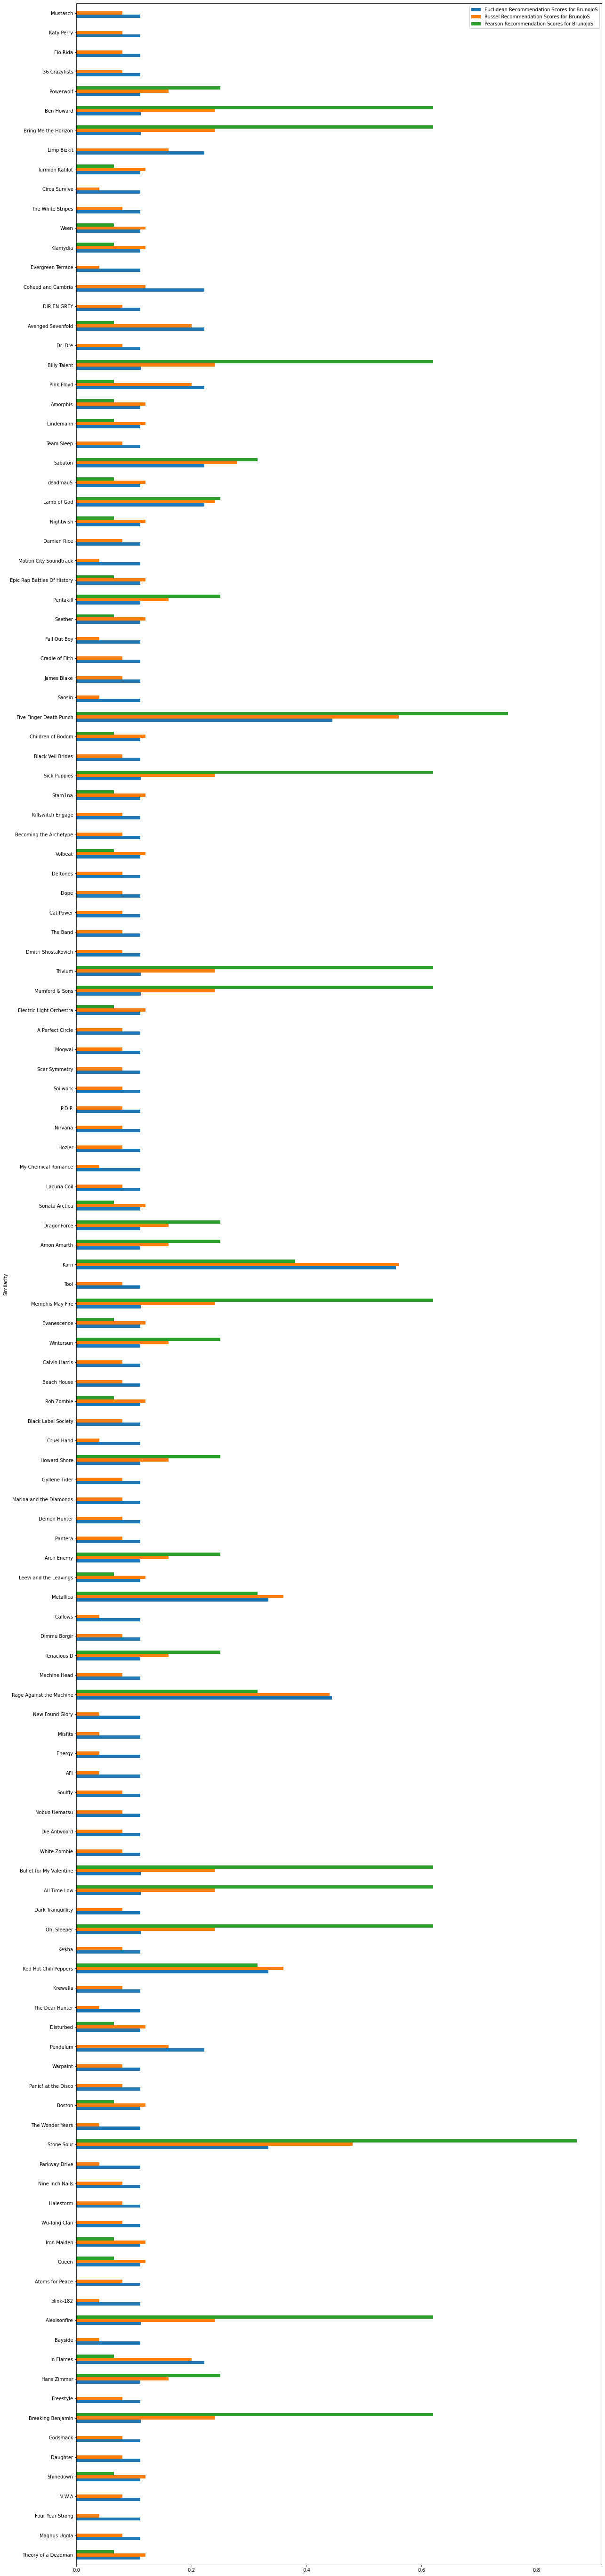

In [62]:
df_combined.plot(kind='barh', ylabel="Similarity", figsize=(20, 100))

Wie man erkennen kann, gibt es teilweise grosse Unterschiede zwischen den Algorithmen. Vor allem der Pearson-Algorithmus
erzeugt ein einzelnen Fällen hoehere Recommendation Scores. Da er fuer die Aufgabe allerdings nicht von Relevanz ist,
werden seine Recommendation-Scores erst einmal ignoriert.

Die Euklid Ähnlichkeit hat einige wichtige Unterschiede zur Russel Ähnlichkeit. Das liegt daran, dass mit der normierten euklidischen Distanz zwischen Usern der Wert immer nahe bei 1 liegt, also letztendlich der entscheidende Faktor für die Empfehlung eines Films ist, wie viele User diesen geliked haben. Das äußert sich auch darin, dass alle Filme, die nur von einem User geliked wurden nahe um einen Empfehlungswert von 0.1 liegen. Kleine Unterschiede sind dabei jedoch signifikant, weil sie die Reihenfolge der Filme bei gleicher Anzahl an Likes bestimmen. Man kann aus dem Diagramm relativ klar herauslesen, wie viel Likes der jeweilige Film erhalten hat. Die Ähnlichkeit der User hat also im Vergleich zu der Anzahl der Likes nur eine relativ geringe kausalität auf das Endergebnis und entscheided im Falle von einer identischen Anzahl an Likes die Reihenfolge. Dies könnte sich jedoch ändern, wenn es deutlich mehr User gibt und zwei Bands eine sehr hohe, aber unterschiedlich Anzahl an Likes von verschiedenen Nutzerdemographien bekommen. 


Um den Unterschied zu den Ähnlichkeitswerten des RusselRao Algorithmus zu diskutieren werden zunächst die Ähnlichkeitswerte der User mit dem RusselRao Algorithmus ausgegeben.

In [63]:
user_sim = get_similar_users(user, user_dict, sim_RusselRao, as_dict=True)
to_df(user_sim, f"User Similarity to {user}")

,User Similarity to BrunoJoS
DPREBOYE,0.013245
MPistol40,0.013245
NemoNightfall,0.039735
SkyRif,0.026490
Wags1382,0.006623
Znapsen,0.013245
cortapsyco,0.013245
emill_67,0.019868
sattuviitana,0.019868


Auffällig ist die deutlich größere Varianz bei den Ähnlichkeiten der Nutzer, wenn diese mit Russel berechnet werden. Das liegt daran, dass der Russel Algorithmus gemeinsame Likes stark gewichtet, was bei unseren Daten zu einer deutlich größeren Varianz führt. Das führt in diesem Fall dazu, dass bei der Russel Ähnlichkeit die Empfehlungen stärker durch die Korrelation zwischen den Nutzer entschieden wird als bei euklid, was man an Unterschieden in der Reihenfolge sehen kann, zum Beispiel in dem Unterschied zwischen Pendulum und Breaking Benjamin. 

### Weitere Investigation

Jetzt koennte es noch interessant sein, welche Algorithmen statistisch oefter einen hoeheren Recommendation-Score erzeugen.
Dafuer wird sich wieder der Similarity-Comparison-Funktion aus Aufgabe 1 bedient. Diese wird mit dem *user_dict*
und jeweils der User-Based-Recommendations-Funktion, sowie den unterschiedlichen Algorithmen ausgefuehrt.

Die Ergebnis werden dann in einem Balken-Diagramm visualisiert.

Persons with similarity greater than 0: ['DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Qu

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', '

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Qu

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'Wags1382', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', '

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Wags1382', 'Znapsen', 'cortapsyco', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: ['NemoNightfall', 'SkyRif', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallo

Persons with similarity greater than 0: ['NemoNightfall', 'SkyRif', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D

Persons with similarity greater than 0: ['BrunoJoS', 'MPistol40', 'NemoNightfall', 'Znapsen', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious 

Persons with similarity greater than 0: ['MPistol40', 'SkyRif', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallows',

Persons with similarity greater than 0: ['BrunoJoS', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Znapsen', 'emill_67']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'D

Persons with similarity greater than 0: ['BrunoJoS', 'DPREBOYE', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Znapsen', 'cortapsyco', 'emill_67', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Q

Persons with similarity greater than 0: []
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallows', 'Metallica', 'Leevi and the Leavings', 'System o

Persons with similarity greater than 0: ['BrunoJoS', 'MPistol40', 'SkyRif', 'sattuviitana']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallows',

Persons with similarity greater than 0: []
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallows', 'Metallica', 'Leevi and the Leavings', 'System o

Persons with similarity greater than 0: ['MPistol40']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'Dimmu Borgir', 'Gallows', 'Metallica', 'Leevi and the Leavings'

Persons with similarity greater than 0: ['BrunoJoS', 'MPistol40', 'NemoNightfall', 'SkyRif', 'Znapsen', 'emill_67']
Individual items: {'Theory of a Deadman', 'Magnus Uggla', 'Four Year Strong', 'Linkin Park', 'N.W.A', 'Shinedown', 'Green Day', 'Daughter', 'Godsmack', 'Breaking Benjamin', 'Freestyle', 'Hans Zimmer', 'In Flames', 'Bayside', 'Alexisonfire', 'blink-182', 'Foo Fighters', 'Atoms for Peace', 'Queen', 'Iron Maiden', 'Lady Gaga', 'Wu-Tang Clan', 'Halestorm', 'Nine Inch Nails', 'Parkway Drive', 'Stone Sour', 'The Wonder Years', 'Boston', 'Panic! at the Disco', 'Arctic Monkeys', 'Warpaint', 'Pendulum', 'Disturbed', 'The Dear Hunter', 'Krewella', 'Red Hot Chili Peppers', 'Ke$ha', '30 Seconds to Mars', 'Oh, Sleeper', 'Dark Tranquillity', 'All Time Low', 'Bullet for My Valentine', 'White Zombie', 'Die Antwoord', 'Nobuo Uematsu', 'Soulfly', 'AFI', 'Misfits', 'New Found Glory', 'Rage Against the Machine', 'Three Days Grace', 'Machine Head', 'Queens of the Stone Age', 'Tenacious D', 'D

,N(Euclid>=RusselRao) / N,N(Euclid>=Pearson) / N,N(Russel>=Pearson) / N
BrunoJoS,0.610687,0.809160,0.809160
DPREBOYE,0.557252,1.000000,1.000000
MPistol40,0.694656,0.694656,0.717557
NemoNightfall,0.610687,0.793893,0.793893
SkyRif,0.404580,0.404580,0.679389
Wags1382,0.862595,1.000000,1.000000
Znapsen,0.595420,0.717557,0.725191
cortapsyco,0.381679,0.870229,0.870229
emill_67,0.519084,0.671756,0.687023
sattuviitana,0.702290,0.702290,0.717557


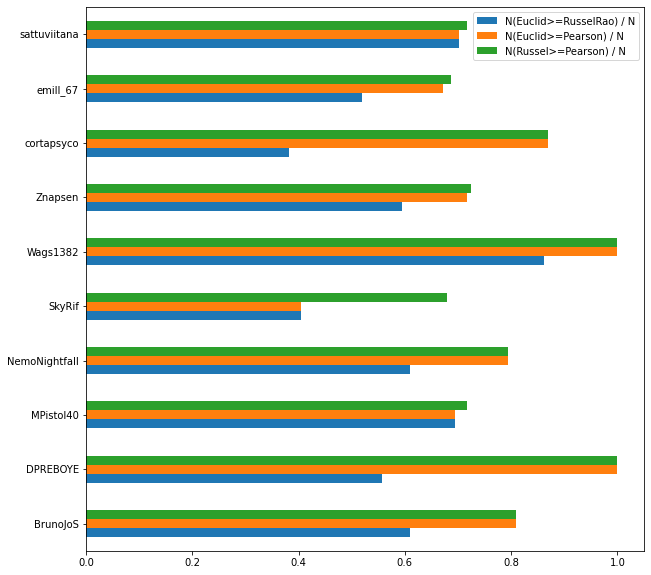

In [64]:
euclid_vs_russel = get_similarity_comparison(user_dict, get_user_recommendations, sim_euclid, sim_RusselRao,
                                             zero_means_unrated=True)
euclid_vs_pearson = get_similarity_comparison(user_dict, get_user_recommendations, sim_euclid, sim_pearson,
                                              zero_means_unrated=True)
russel_vs_pearson = get_similarity_comparison(user_dict, get_user_recommendations, sim_RusselRao, sim_pearson,
                                              zero_means_unrated=True)

df_eclid_vs_russel = to_df(euclid_vs_russel, "N(Euclid>=RusselRao) / N")
df_eclid_vs_pearson = to_df(euclid_vs_pearson, "N(Euclid>=Pearson) / N")
df_russel_vs_pearson = to_df(russel_vs_pearson, "N(Russel>=Pearson) / N")

comparison_df = pd.concat([df_eclid_vs_russel, df_eclid_vs_pearson, df_russel_vs_pearson], axis=1)
comparison_df.plot(kind='barh', figsize=(10, 10))
comparison_df

Je hoeher der Wert, desto oefter hat der jeweilig erst genannte Algorithmus einen hoeheren oder gleichen Score
erzeugt, als der zweite Algorithmus.

Anders als erwartet sind keine klaren Zussammenhänge erkennbar. Es scheint, als würde die größe der Werte sich in den jeweiligen Fällen unterscheiden und nicht hauptsächlich mit dem benutzten Algorithmus zusammenhängen.

Um mehr Klarheit zu erlange könnte man noch weitere Verhältnisse plotten. 